In [6]:
# Let's load the dataset and take a look at the columns and data to understand its structure
import pandas as pd

# Load the dataset
file_path = './pollution_report.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names of the dataset to understand its structure
data.head(), data.columns


(   id            timestamp  d_pm10  d_pm2p5  pm10  o3  no2  so2  co  \
 0   1  2024-08-18 18:17:42     NaN      NaN  60.0   0    6    1   7   
 1   2  2024-08-18 18:18:58     NaN      NaN  60.0   0    6    1   7   
 2   3  2024-08-18 18:22:58     NaN      NaN  60.0   0    6    1   7   
 3   4  2024-08-18 18:24:45     NaN      NaN  60.0   0    6    1   7   
 4   5  2024-08-18 18:28:08     NaN      NaN  60.0   0    6    1   7   
 
    dew_point  ...                     p2si1                       p2si2  \
 0        0.0  ...  Adopt Clean Technologies  Improve Emission Standards   
 1        0.0  ...  Adopt Clean Technologies  Improve Emission Standards   
 2        0.0  ...  Adopt Clean Technologies  Improve Emission Standards   
 3        0.0  ...  Adopt Clean Technologies  Improve Emission Standards   
 4        0.0  ...  Adopt Clean Technologies  Improve Emission Standards   
 
                    p2si3  pollutant3                p3sp1  \
 0  Dust Control Measures         NO2  Ventila

In [7]:
# Remove rows where 'pm10', 'hum', or 'temp' have NaN or 0 values
filtered_data = data.dropna(subset=['pm10', 'hum', 'temp'])  # Drop rows with NaN values in the specified columns
filtered_data = filtered_data[(filtered_data['pm10'] != 0) & (filtered_data['hum'] != 0) & (filtered_data['temp'] != 0)]  # Remove rows with 0 values

# Save the filtered data back to a new CSV file
filtered_data.to_csv('./filtered_pollution_report.csv', index=False)

# Display the first few rows of the filtered data
filtered_data.head()


,id,timestamp,d_pm10,d_pm2p5,pm10,o3,no2,so2,co,dew_point,...,p2si1,p2si2,p2si3,pollutant3,p3sp1,p3sp2,p3sp3,p3si1,p3si2,p3si3
507,508,2024-08-20 16:31:02,NaN,NaN,34.0,2,6,3,4,80.1,...,Catalytic Converters,Low-NOx Burners,Traffic Management,co,Install CO Detectors,Regular Vehicle Maintenance,Avoid Idling,Engine Tuning and Maintenance,Promote Electric Vehicles,Improve Combustion Efficiency
509,510,2024-08-20 16:36:15,NaN,NaN,34.0,2,6,3,4,80.1,...,Catalytic Converters,Low-NOx Burners,Traffic Management,co,Install CO Detectors,Regular Vehicle Maintenance,Avoid Idling,Engine Tuning and Maintenance,Promote Electric Vehicles,Improve Combustion Efficiency
540,541,2024-08-20 19:07:08,37.0,31.2947,37.0,1,6,1,5,82.3,...,Engine Tuning and Maintenance,Promote Electric Vehicles,Improve Combustion Efficiency,PM10,Use Air Purifiers,Wear Masks,Avoid Outdoor Activities,Adopt Clean Technologies,Improve Emission Standards,Dust Control Measures
542,543,2024-08-20 19:13:37,33.0,31.2947,33.0,0,6,2,9,82.3,...,Catalytic Converters,Low-NOx Burners,Traffic Management,PM10,Use Air Purifiers,Wear Masks,Avoid Outdoor Activities,Adopt Clean Technologies,Improve Emission Standards,Dust Control Measures
547,548,2024-08-20 19:33:59,33.0,31.2947,33.0,0,6,2,9,82.3,...,Catalytic Converters,Low-NOx Burners,Traffic Management,PM10,Use Air Purifiers,Wear Masks,Avoid Outdoor Activities,Adopt Clean Technologies,Improve Emission Standards,Dust Control Measures


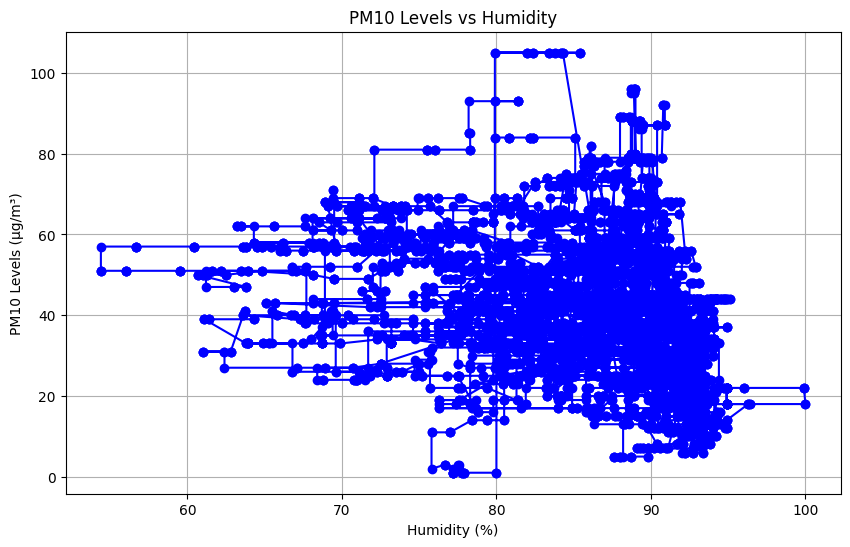

In [8]:
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['hum'], filtered_data['pm10'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Humidity (%)')
plt.ylabel('PM10 Levels (µg/m³)')
plt.title('PM10 Levels vs Humidity')
plt.grid(True)

# Show the plot
plt.show()


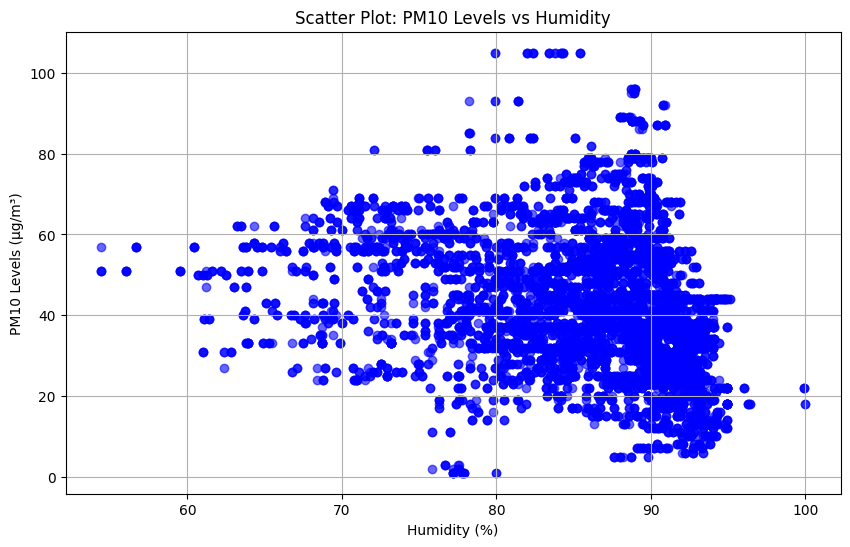

Correlation coefficient between humidity and PM10: -0.263


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['hum'], filtered_data['pm10'], color='b', alpha=0.6)

# Adding labels and title
plt.xlabel('Humidity (%)')
plt.ylabel('PM10 Levels (µg/m³)')
plt.title('Scatter Plot: PM10 Levels vs Humidity')
plt.grid(True)

# Show the plot
plt.show()

# Calculate and display the correlation coefficient
correlation = filtered_data['hum'].corr(filtered_data['pm10'])
print(f"Correlation coefficient between humidity and PM10: {correlation:.3f}")


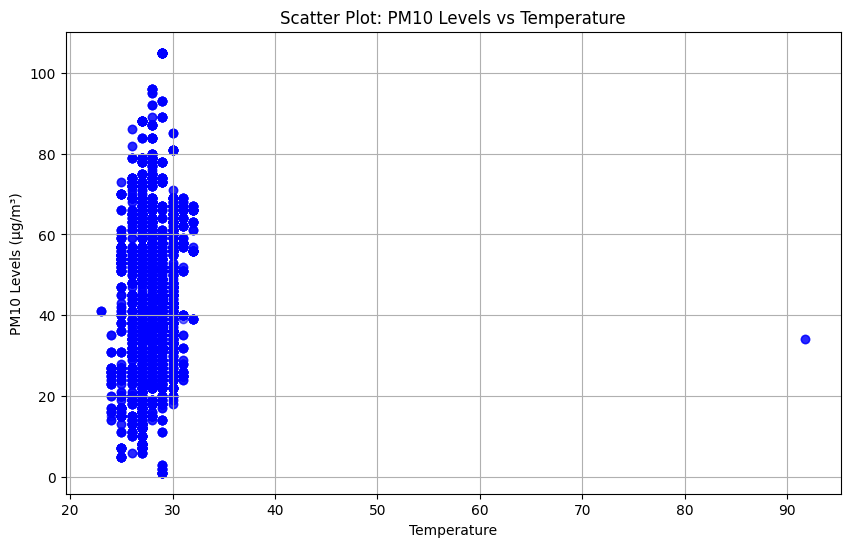

Correlation coefficient between Temperature and PM10: 0.111


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['temp'], filtered_data['pm10'], color='b', alpha=0.6)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('PM10 Levels (µg/m³)')
plt.title('Scatter Plot: PM10 Levels vs Temperature')
plt.grid(True)

# Show the plot
plt.show()

# Calculate and display the correlation coefficient
correlation = filtered_data['temp'].corr(filtered_data['pm10'])
print(f"Correlation coefficient between Temperature and PM10: {correlation:.3f}")

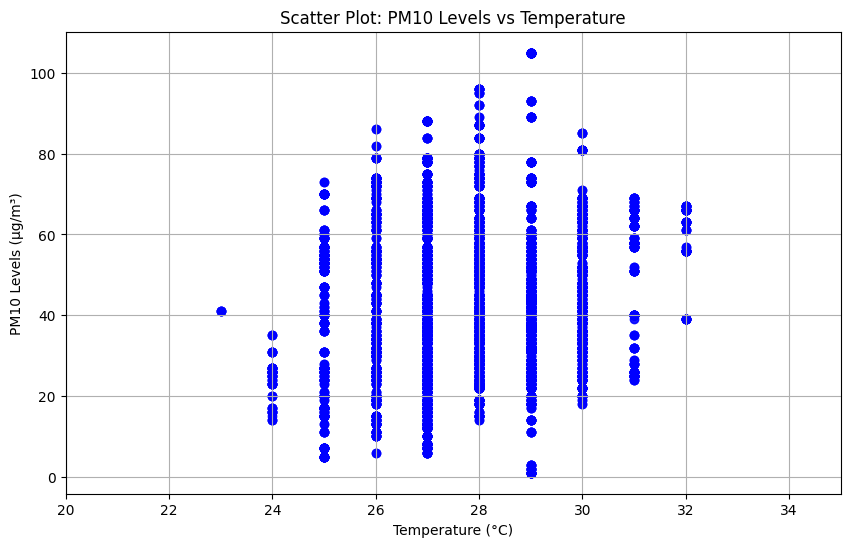

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

cleaned_data = pd.read_csv('./filtered_pollution_report.csv')

# Plotting the scatter plot with the specified x-axis limits
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['temp'], cleaned_data['pm10'], color='b', alpha=0.9)

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('PM10 Levels (µg/m³)')
plt.title('Scatter Plot: PM10 Levels vs Temperature')

# Set the x-axis limit between 10 and 50 degrees
plt.xlim(20, 35)

# Adding a grid
plt.grid(True)

# Show the plot
plt.show()


In [13]:
import pandas as pd

# Load the dataset from the file
file_path = 'historical_air_quality_data.xlsx'  # Update the path to your actual file

# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the columns for which we want to calculate min and max
columns_to_track_24 = ['PM10', 'PM2.5', 'NH3', 'SO2', 'NO2']
columns_to_track_8 = ['CO','O3']

# Initialize the new columns as 0 for the first 24 rows
for col in columns_to_track_24:
    df[f'min_{col.lower()}'] = 0
    df[f'max_{col.lower()}'] = 0

for col in columns_to_track_8:
    df[f'min_{col.lower()}'] = 0
    df[f'max_{col.lower()}'] = 0

# Calculate rolling min and max for each column, skipping the first 24 rows
for col in columns_to_track_24:
    df[f'min_{col.lower()}'] = df[col].rolling(window=24, min_periods=24).min().fillna(0)
    df[f'max_{col.lower()}'] = df[col].rolling(window=24, min_periods=24).max().fillna(0)

for col in columns_to_track_8:
    df[f'min_{col.lower()}'] = df[col].rolling(window=8, min_periods=8).min().fillna(0)
    df[f'max_{col.lower()}'] = df[col].rolling(window=8, min_periods=8).max().fillna(0)


for col in columns_to_track_24:
    df[f'avg_{col.lower()}'] = (df[f'min_{col.lower()}'] + df[f'max_{col.lower()}']) / 2

for col in columns_to_track_8:
    df[f'avg_{col.lower()}'] = (df[f'min_{col.lower()}'] + df[f'max_{col.lower()}']) / 2

df['avg_co'] = df['avg_co']/1000

# Display the updated DataFrame
print(df.head(30))  # Display the first 30 rows to see the changes

df = df[23:].reset_index(drop=True)  # This will reset the index after dropping the rows

# Calculate the maximum value across the specified columns for each row
df['redefined_aqi'] = df[['avg_pm10', 'avg_pm2.5', 'avg_nh3', 'avg_so2', 'avg_no2']].max(axis=1)

# Display the updated DataFrame with the new 'max_avg' column
print(df[['avg_pm10', 'avg_pm2.5', 'avg_nh3', 'avg_so2', 'avg_no2', 'redefined_aqi']].head())



               DateTime  AQI       CO     NO     NO2      O3     SO2   PM2.5  \
0   2020-11-25 01:00:00    5  2296.45   0.10   63.06   12.16   25.99  417.26   
1   2020-11-25 02:00:00    5  2323.15   0.73   71.97   10.01   29.80  415.69   
2   2020-11-25 03:00:00    5  2616.88   8.16   87.74   15.38   37.19  430.46   
3   2020-11-25 04:00:00    5  2216.34   8.27   80.20   62.23   54.84  383.96   
4   2020-11-25 05:00:00    5  1895.90   9.72   71.97   85.12   50.55  297.80   
5   2020-11-25 06:00:00    5  1508.71   7.60   59.63  114.44   51.50  203.82   
6   2020-11-25 07:00:00    5   934.60   2.71   30.50  155.93   53.41  114.32   
7   2020-11-25 08:00:00    5   988.01   1.72   31.87  181.68   62.94  121.68   
8   2020-11-25 09:00:00    5  1094.82   1.30   42.16  191.69   80.11  140.36   
9   2020-11-25 10:00:00    5  1508.71   1.48   78.14  188.83  133.51  221.37   
10  2020-11-25 11:00:00    5  1895.90   1.31  106.93  180.24  175.48  305.31   
11  2020-11-25 12:00:00    5  1789.09   

In [14]:
df.to_csv('./min_max_data.csv')

In [15]:
# Drop the specified columns
df = df.drop(columns=['min_pm10','min_pm2.5','max_pm10','max_pm2.5','min_nh3','max_nh3','min_so2','max_so2','min_no2','max_no2','min_co','max_co','min_o3','max_o3','avg_pm10', 'avg_pm2.5', 'avg_nh3', 'avg_so2', 'avg_no2','avg_co','avg_o3'])



In [16]:
df.to_csv('final_data.csv')